
K-Neighbors Classifier:
[[ 80. 103.  30.  98. 126.  59.   0.   0.   0.   0.   0.   0.]
 [ 82.  51.  24. 111.  82. 121.   0.   0.   0.   0.   0.   0.]
 [ 90.  50.  19.  88.  97.  76.   0.   0.   0.   0.   0.   0.]
 [ 94. 151.  10.  72.  78. 103.   0.   0.   0.   0.   0.   0.]
 [130. 114.  11. 104.  78. 119.   0.   0.   0.   0.   0.   0.]
 [ 97. 188.  18.  67. 128.  47.   0.   0.   0.   0.   0.   0.]
 [  4.   7.   2.   6.   2.   2.   0.   0.   0.   0.   0.   0.]
 [  2.   3.   0.   1.   4.   0.   0.   0.   0.   0.   0.   0.]
 [  3.  14.   2.   6.   4.   3.   0.   0.   0.   0.   0.   0.]
 [  4.   6.   2.   5.   5.   3.   0.   0.   0.   0.   0.   0.]
 [ 16.   9.   5.   6.   2.  11.   0.   0.   0.   0.   0.   0.]
 [  4.   9.   0.   3.   9.   2.   0.   0.   0.   0.   0.   0.]]

Precision for KNN: 
[13.2, 7.23, 15.45, 12.7, 12.68, 8.61, nan, nan, nan, nan, nan, nan]
Recall for KNN: 
[16.13, 10.83, 4.52, 14.17, 14.03, 8.62, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Accuracy for KNN: 
10.97


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars


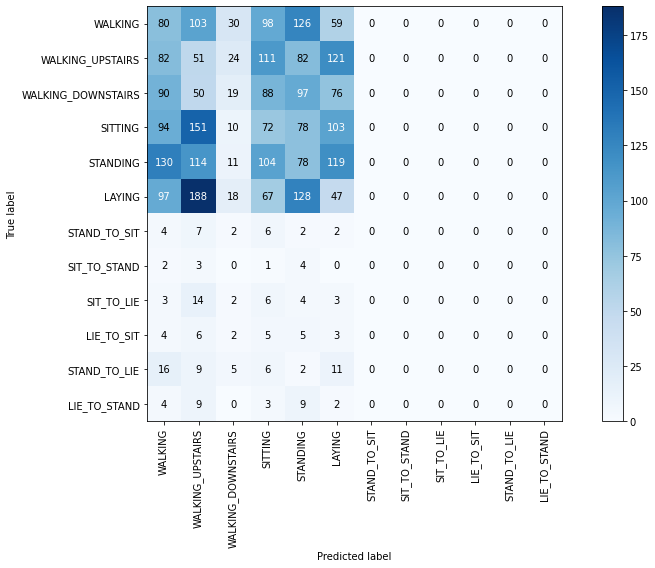

In [62]:
#knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def loadData(filename):
    X = np.loadtxt(filename)
    return X

processed_X_train = pd.read_csv('pca_train.csv')
#len(processed_X_train.columns)
processed_X_test = pd.read_csv('pca_test.csv')

y_train = loadData('y_train.txt')
y_test = loadData('y_test.txt')

X_train = processed_X_train.drop(['subject', 'Activity','Unnamed: 0','pca_1'], axis=1)
X_test = processed_X_test.drop(['subject', 'Activity','Unnamed: 0','pca_1'], axis=1)

def total_count(y):
    count = np.zeros(12)
    for i in range(y.size):
        if (y[i] == 1):
            count[0] += 1
        if (y[i] == 2):
            count[1] += 1
        if (y[i] == 3):
            count[2] += 1
        if (y[i] == 4):
            count[3] += 1
        if (y[i] == 5):
            count[4] += 1
        if (y[i] == 6):
            count[5] += 1
        if (y[i] == 7):
            count[6] += 1
        if (y[i] == 8):
            count[7] += 1
        if (y[i] == 9):
            count[8] += 1
        if (y[i] == 10):
            count[9] += 1
        if (y[i] == 11):
            count[10] += 1
        if (y[i] == 12):
            count[11] += 1
    return count

y_test_count = total_count(y_test)

def confusion_matrix(y_test, y_pred):
    cm = np.zeros((12, 12))
    for i in range(12):
        for j in range(12):
            for k in range(y_pred.size):
                if (y_pred[k] == j + 1 and y_test[k] == i + 1):
                    cm[i][j] += 1
    return cm

def pre_rec(cm, count):
    perc = []
    for i in range(12):
        perc.append(float("{0:.2f}".format(cm[i][i] / count[i] * 100)))
    return perc
        
def overall_accuracy(cm, y_test):
    sum = 0
    for i in range(12):
        sum += cm[i][i]
    return float("{0:.2f}".format(sum * 100.0 / y_test.size)) 

def plot_confusion_matrix(cm,lables,img_name):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('figures/'+img_name)


knc = KNeighborsClassifier(14)
knc.fit(X_train, y_train)
y_predict_knc = knc.predict(X_test)

y_pred_count_knc = total_count(y_predict_knc)
cmatrix_knc = confusion_matrix(y_test, y_predict_knc)

print("\nK-Neighbors Classifier:")
print(cmatrix_knc)
print("")

recall_knc = pre_rec(cmatrix_knc, y_test_count)
precision_knc = pre_rec(cmatrix_knc, y_pred_count_knc)
accuracy_knc = overall_accuracy(cmatrix_knc, y_test)

print("Precision for KNN: ")
print(precision_knc)
print("Recall for KNN: ")
print(recall_knc)
print("Accuracy for KNN: ")
print(accuracy_knc)
labels = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']
plot_confusion_matrix(cmatrix_knc,labels,'knn_cm')   

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np


rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1,n_estimators = 600,verbose=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
species = np.array(y_test)
predictions = np.array(y_pred)
conf = confusion_matrix(species, predictions)
plot_confusion_matrix(conf,labels,'rf_cm')
accuracy_rf = overall_accuracy(conf, y_test)
print("Accuracy for RF: ")
print(accuracy_rf)

DecisionTreeClassifier(criterion='entropy', max_depth=55)
Accuracy: 0.8339658444022771


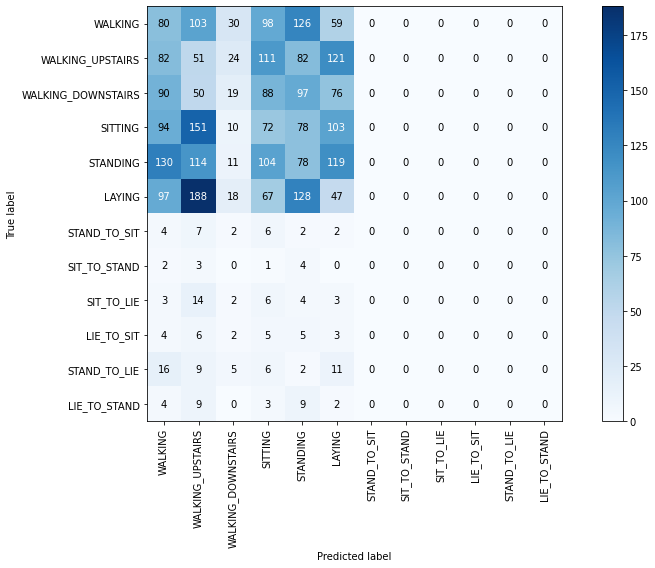

In [63]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=55)
print(clf)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cmatrix_knc,labels,'dt_cm')

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix


#y_pre_knn = le.fit_transform(y_pre_knn)
svc = LinearSVC(verbose=2,max_iter=21000)
print(svc)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(cmatrix_knc,labels,'svc')